# Data Mining on Sentiment Analysis

---

## Preliminaries

Import libraries. **You can add other libraries if necessary.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Data transformation
from sklearn.model_selection import train_test_split  # Data testing
from sklearn.model_selection import KFold   # K-fold   
from sklearn.model_selection import cross_val_predict   # K-fold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  # Comparison between real and predicted
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import SparsePCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import sparse
from sklearn.utils import shuffle
import re  # Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lidongting\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lidongting\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load the data and add column keys.

In [124]:
train_data = pd.read_csv("data/sentiment_train.csv", header=None)
test_data = pd.read_csv("data/sentiment_test.csv", header=None)
train_data.columns = ['id', 'information', 'type', 'text']
test_data.columns = ['id', 'information', 'type', 'text']

Take a glance at the provided data.

In [125]:
train_data.info()
train_data.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74682 non-null  int64 
 1   information  74682 non-null  object
 2   type         74682 non-null  object
 3   text         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


Each item consists of 4 columns, where Columns ID and Information are almost task-irrevalent. **Column Type is users' sentiments, which we should predict as our labels based on Column Text.**
Now let's take a look at possible values of Column Type.

In [126]:
train_data["type"].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: type, dtype: int64

In [127]:
test_data["type"].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: type, dtype: int64

There are 4 possible values, and ***our goal is to perform the quadruple classification over texts.***

---

## Data Processing

To prepare the data for the text analysis, we should:
- Filter texts with only letters and numbers
- Turn the texts into lower case
> **TODO**

Complete the `preprocess` function, which takes a piece of texts as input (not necessary of type `str`), you should convert it to `str`, and outputs the preprocessed string.  
Some functions that might be helpful:
- `re.sub`
- `str.lower`

In [128]:
def preprocess(text):
    # TODO
    return re.sub(r'[^a-z0-9\s]',' ', str(text).lower())  # modify this line
preprocess("hello world!")

'hello world '

Perform preprocessing, and compare the raw text and the preprocessed tokens.

In [129]:
train_data["clean"] = train_data.text.apply(preprocess)
test_data["clean"] = test_data.text.apply(preprocess)
train_data.head(40)

,id,information,type,text,clean
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...


---

## Feature Engineering

The feature engineering with clean texts starts from text tokenization, i.e., split the text into word tokens. Let's see what the tokenization do. It groups all the texts by words stored on a list.

In [130]:
print(train_data.text[6])
print(train_data.clean[6])
print(word_tokenize(train_data.clean[6]))

So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
so i spent a few hours making something for fun      if you don t know i am a huge  borderlands fan and maya is one of my favorite characters  so i decided to make myself a wallpaper for my pc    here is the original image versus the creation i made    enjoy  pic twitter com mlsi5wf9jg
['so', 'i', 'spent', 'a', 'few', 'hours', 'making', 'something', 'for', 'fun', 'if', 'you', 'don', 't', 'know', 'i', 'am', 'a', 'huge', 'borderlands', 'fan', 'and', 'maya', 'is', 'one', 'of', 'my', 'favorite', 'characters', 'so', 'i', 'decided', 'to', 'make', 'myself', 'a', 'wallpaper', 'for', 'my', 'pc', 'here', 'is', 'the', 'original', 'image', 'versus', 'the', 'creation', 'i', 'made', 'enjoy', 'pic', 'twitter', 'com', '

We can count the total number of tokens in the training data.

In [131]:
len(set(token for text in train_data.clean for token in word_tokenize(text)))

30436

Stop words are the words in a stop list which are filtered out (i.e. stopped) before or after processing of natural language data (text) because they are insignificant. We can refer to `nltk.corpus.stopwords` to obtain the stop words to use.

In [132]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
print(len(stop_words), stop_words[:10])

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


With text tokenization tools, we can conduct feature engineering on texts with stop words filtered out.

For simplification, we mainly consider two possible features:
- **Word count**: a vector with the dimension of the number of tokens, the value in each dimension is the number of occurrences of the corresponding word token.
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: a "weighted version" of word count, each value is the term frequency (normalized by total number of tokens) multiplies the inverse of the frequency of documents consisting this word token. For details please refers to https://en.wikipedia.org/wiki/Tf%E2%80%93idf.

> **TODO**

Sklearn provides the implementation of the two feature extraction methods, and the interface is in the following. **You should manually re-implement at least one of them in our provided framework.**

*Hint: if you are concerned about the too large dimension, which might slow the model inference, there are three possible solutions which you can have a try:*
- *Hashing: hash the vector into low dimensions with a function from high-dimension index to lower one. We provide a simple hash function and you can also implement a complex one.*
- *Random projection: project the vector into low-dimension space with a fixed random projection. We provide a simple projection method.*
- *Sparsity: use sparse matrices instead of dense ones, which is used in sklearn's implementation. Please refer to https://docs.scipy.org/doc/scipy/reference/sparse.html for more details.*

In [133]:
class ManualVectorizer(object):
    """
    Manual vectorizer.
    """
    def __init__(self, tokenizer, stop_words):
        """
        Initialize the vectorizer.
        You can add additional attributes.
        """
        self.tokenizer = tokenizer
        self.stop_words = stop_words
        # TODO
        self.features = None
        self.n_feature = None

    def fit_transform(self, texts):
        """
        Fit the dictionary and other attributes (such as IDF) with the texts, and then perform feature extraction.
        This method is used on training data.

        Parameters:
            raw_documents (List[str]): a list of untokenized texts.

        Return:
            np.array: a 2-D array where each row refers to the feature vector of the corresponding text.
        """
        # TODO
        self.features = list(token for text in texts for token in word_tokenize(text))
        for token in self.stop_words:
            if token in self.features:
                self.features.remove(token)
        self.n_feature = len(self.features)
        self.features = dict(zip(self.features, np.arange(self.n_feature)))
        # print(type(self.features))
        return self.transform(texts)
                
                
        
    
    def transform(self, texts):
        """
        Perform feature extraction with the learned dictionary and other attributes.
        This method is used on test data.
        Note: if a word token does not appear in training data, it will not be counted as the test feature.

        Parameters:
            raw_documents (List[str]): a list of untokenized texts.

        Return:
            np.array or np.matrix: a 2-D array where each row refers to the feature vector of the corresponding text.
        """
        # TODO
        max_row = len(texts)
        row = []
        col = []
        value = []
        for i in np.arange(max_row): 
            for token in word_tokenize(texts[i]):
                if token in self.features.keys():
                    row.append(i)
                    col.append(self.features[token])
                    value.append(1)

        return sparse.csr_matrix((value,(row,col)),shape=[max_row,self.n_feature])

        

In [134]:
wordcount_extractor = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
)

tfidf_extractor = TfidfVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
)

manual_extractor = ManualVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
)
extractor = tfidf_extractor  # TODO: you can modify here
# 验证
# manual_extractor.fit_transform(test_data.clean)

In [135]:
class Identity(object):
    """
    Do nothing.
    """
    def __init__(self):
        pass

    def __call__(self, xs):
        return xs


class VectorHasher(object):
    """
    Vector hasher for dimension reduction.
    """
    def __init__(self, target_length=100, hash_func=None):
        self.target_length = target_length
        if hash_func is None:
            self.hash_func = lambda x: x % self.target_length
        else:
            self.hash_func = hash_func
    
    def __call__(self, xs):
        hashed_xs = np.matrix(np.zeros(xs.shape[:-1] + (self.target_length, )))
        for idx in range(xs.shape[-1]):
            hashed_idx = self.hash_func(idx)
            hashed_xs[:, hashed_idx] += xs[:, idx]
        return hashed_xs


class VectorProjector(object):
    """
    Vector projector for dimension reduction.
    """
    def __init__(self, target_length=30):
        self.k = target_length
        self.projector = None
    
    def __call__(self, xs):
        return xs * self.projector
    
    def fit(self, xs):
        self.projector = sparse.rand(xs.shape[1], self.k)
        return xs * self.projector
    
class VectorPCA(object):
    """
    Vector PCA for dimension reduction.
    """
    def __init__(self, target_length=30):
        self.k = target_length
        self.projector = None
    

    def __call__(self, xs):
        return xs * self.projector
    
    # 训练降维方法
    def fit(self, xs):
        n_samples, n_features = xs.shape
        # normalization
        scatter_matrix = sparse.csr_matrix.transpose(xs) * xs
        eig_val, self.projector = sparse.linalg.eigs(scatter_matrix, k=self.k, which='LR' )
        self.projector = self.projector.real
        return xs * self.projector
    

In [136]:
identity = Identity()
hasher = VectorHasher(target_length=4000)
projector = VectorProjector(target_length=1000)
PCAer = VectorPCA(target_length=1000)

vector_post_process = hasher  # TODO: you can modify here

In [137]:
X_train_raw = vector_post_process(extractor.fit_transform(train_data.clean))
X_test = vector_post_process(extractor.transform(test_data.clean))
print(X_train_raw.shape, X_test.shape)

d:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(74682, 4000) (1000, 4000)


For label features, it is natual to assign each label name with an index.

In [138]:
name_to_index = {
    "Positive": 0,
    "Negative": 1,
    "Neutral": 2,
    "Irrelevant": 3,
}
y_train_raw = np.asarray(train_data.type.apply(lambda x: name_to_index[x]))
y_test = np.asarray(test_data.type.apply(lambda x: name_to_index[x]))
y_train_raw[:120]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

---

## Model Selection

In order to train a model and perform model selection, we should split the raw training data into *training data* and *validation data*
> **TODO**

**Split the data into training data and validation data with proper ratio. You can use `train_test_split` function.**

In [139]:
# TODO
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.1, shuffle=True)  # modify this line

print(X_train.shape, X_val.shape)

(67213, 4000) (7469, 4000)


Now it's time to train your models and select the best ones.

> **TODO**

**Train your model on `X_train` and `y_train`, and select your model on `X_val` and `y_val`**

We provide an example of `DecisionTreeClassifier`. Now it's time for you to select the model you like to conduct classification.

> Requirements
- Select at least **three** other Machine Learning classification models and train them on the train split. And among them you should implement at least **one** by yourself with our provided interface.

In [174]:
class ManualModel_MLP(object):
    """
    Manual model with sklearn-style interface.
    """
    def __init__(self, lr = 100, epochs =10, batch_size=64, hidden_dim = 100):
        """
        Initialize the model with some hyperparameters. You can modify the arguments.
        """
        # TODO
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.hidden_dim = hidden_dim
        self.w1 = None
        self.w2 = None
        

    def fit(self, X, y):
        """
        Fit the model on training set.

        Parameters:
            X: inputs of training data.
            y: labels of training data.
        """
        # TODO
        train_x = np.array(X)
        train_y = y.reshape(-1,1) 
        enc = OneHotEncoder()
        enc.fit(train_y)
        
        train_y = enc.transform(train_y).toarray()
        
        # print(train_y)
        input_dim = train_x.shape[1]
        output_dim = train_y.shape[1]
        self.w1 = 2 * (np.random.random(size=(input_dim, self.hidden_dim)) / input_dim ** 0.5) - 1. / input_dim ** 0.5
        self.w2 = 2 * (np.random.random(size=(self.hidden_dim, output_dim)) / self.hidden_dim ** 0.5) - 1. / self.hidden_dim ** 0.5
        losses=[]

        for epoch in range(self.epochs):
            # train for one epoch
        

            # random shuffle dataset

            shuffle(train_x,train_y)
            

            n_iterations = train_x.shape[0] // self.batch_size

            for i in range(n_iterations):
                # load a mini-batch
                x_batch = train_x[i * self.batch_size: (i + 1) * self.batch_size, :] # B x input_dim
                y_batch = train_y[i * self.batch_size: (i + 1) * self.batch_size, :] # B x 4

                # compute loss and gradients
                loss, dw2, dw1 = self.calc_loss_and_grad(x_batch, self.w1, self.w2, y_batch)
                losses.append(loss)
                # update parameters
                self.w1 -= self.lr * dw1
                self.w2 -= self.lr * dw2

        # plt.plot(np.arange(len(losses)),losses)
        # plt.xlabel("iterations")
        # plt.ylabel("loss")
        # plt.show()
        

    def predict(self, X):
        """
        Predict the labels of inputs X with the trained model.

        Parameters:
            X: inputs of test data
        
        Return:
            The predicted labels of test data.
        """
        # TODO
        y_hat = self.calc_loss_and_grad(x=X, w1=self.w1, w2=self.w2, eval_only=True)
        predictions = np.argmax(y_hat, axis=1)
        return predictions
        
    
    def sigmoid(self, x):
        # TODO: forward pass of Sigmoid
        return 1 / (1 + np.exp(-x))
    

    def softmax(self, x):
        # TODO: forward pass of Softmax
        max_x = np.max(x, axis=1).reshape(-1,1)
        return np.exp(x - max_x) / np.sum(np.exp(x - max_x), axis = 1).reshape(-1,1)
    
    def calc_loss_and_grad(self, x, w1, w2, y=None, eval_only=False):
        """Forward Propagation and Backward Propagation.

        Given a mini-batch of images x, associated labels y, and a set of parameters, compute the
        cross-entropy loss and gradients corresponding to these parameters.

        :param x: images of one mini-batch.
        :param y: labels of one mini-batch.
        :param w1: weight parameters of layer 1.
        :param w2: weight parameters of layer 2.
        :param eval_only: if True, only return the loss and predictions of the MLP.
        :return: a tuple of (loss, dw2, dw1)
        """
    
        # TODO: forward pass of network
        # 第一层
        
        z = np.dot(x, w1)
        h = self.sigmoid(z)
        # 第二层
        
        o = np.dot(h, w2)  
        y_hat = self.softmax(o)
        if eval_only:
            return y_hat
        
        # 损失函数
        
        loss = - np.sum(y * np.log(y_hat)) / len(y)
       
      
        # TODO: backward pass of network
        dw2 = np.dot(np.transpose(h), y_hat - y) / len(h)
        dh = np.dot(y_hat - y, np.transpose(w2))
        dsigmiod = self.sigmoid(z) * (1 - self.sigmoid(z))
        dw1 = np.dot(np.transpose(x), dh * dsigmiod) / len(x)

        return loss, dw2, dw1 


In [164]:
class ManualModel_LR(object):
    """
    Manual model with sklearn-style interface.
    """
    def __init__(self, lr = 100, epochs =10, batch_size=64):
        """
        Initialize the model with some hyperparameters. You can modify the arguments.
        """
        # TODO
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.lambdaa = 0.1
        self.w = None

    def fit(self, X, y):
        """
        Fit the model on training set.

        Parameters:
            X: inputs of training data.
            y: labels of training data.
        """
        # TODO
        train_x = np.array(X)
        train_y = y.reshape(-1,1) 
        enc = OneHotEncoder()
        enc.fit(train_y)
        
        train_y = enc.transform(train_y).toarray()
        
        # print(train_y)
        input_dim = train_x.shape[1]
        output_dim = train_y.shape[1]
        self.w = np.random.random(size=(input_dim, output_dim))
        losses =[]
       
        for epoch in range(self.epochs):
            # train for one epoch
        

            # random shuffle dataset

            shuffle(train_x,train_y)
            

            n_iterations = train_x.shape[0] // self.batch_size

            for i in range(n_iterations):
                # load a mini-batch
                x_batch = train_x[i * self.batch_size: (i + 1) * self.batch_size, :] # B x input_dim
                y_batch = train_y[i * self.batch_size: (i + 1) * self.batch_size, :] # B x 4

                # compute loss and gradients
                loss, dw = self.calc_loss_and_grad(x_batch, self.w, y_batch)
                losses.append(loss)
                # update parameters
                self.w -= self.lr * dw * np.exp(- i / n_iterations)

        # plt.plot(np.arange(len(losses)),losses)
        # plt.xlabel("iterations")
        # plt.ylabel("loss")
        # plt.show()
      
        

    def predict(self, X):
        """
        Predict the labels of inputs X with the trained model.

        Parameters:
            X: inputs of test data
        
        Return:
            The predicted labels of test data.
        """
        # TODO
        y_hat = self.calc_loss_and_grad(x=X, w=self.w, eval_only=True)
        predictions = np.argmax(y_hat, axis=1)
        return predictions
    
    def sigmoid(self, x):
        # TODO: forward pass of Sigmoid
        return 1 / (1 + np.exp(-x))
    

    def softmax(self, x):
        # TODO: forward pass of Softmax
        max_x = np.max(x, axis=1).reshape(-1,1)
        return np.exp(x - max_x) / np.sum(np.exp(x - max_x), axis = 1).reshape(-1,1)

    def calc_loss_and_grad(self, x, w, y=None, eval_only=False):
        """Forward Propagation and Backward Propagation.

        Given a mini-batch of images x, associated labels y, and a set of parameters, compute the
        cross-entropy loss and gradients corresponding to these parameters.

        :param x: images of one mini-batch.
        :param y: labels of one mini-batch.
        :param w1: weight parameters of layer 1.
        :param w2: weight parameters of layer 2.
        :param eval_only: if True, only return the loss and predictions of the MLP.
        :return: a tuple of (loss, dw2, dw1)
        """
    
        # TODO: forward pass of network
    
        
        o = np.dot(x, self.w)  
        y_hat = self.softmax(o)
        if eval_only:
            return y_hat
        
        # 损失函数
        
        loss = - np.sum(y * np.log(y_hat)) / len(y)
       
      
        # TODO: backward pass of network
        dw = np.dot(np.transpose(x), y_hat - y) / len(x)
        
        return loss, dw

In [142]:
name_acc_list = {
    "name": [],
    "acc": []
}


def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    prds = model.predict(X_train)
    acc = 100 * accuracy_score(y_train, prds)
    print(f'Model: {name}, train_Accuracy: {acc}%')
    prds = model.predict(X_val)
    acc = 100 * accuracy_score(y_val, prds)
    name_acc_list["name"].append(name)
    name_acc_list["acc"].append(acc)
    print(f'Model: {name}, val_Accuracy: {acc}%')

In [143]:
model_0 = DecisionTreeClassifier()
model_assess(model_0, "DT")

Model: DT, train_Accuracy: 96.78038474699835%
Model: DT, val_Accuracy: 79.47516401124649%


C:\Users\LIDONG~1\AppData\Local\Temp/ipykernel_22464/2302008395.py:124: RuntimeWarning: divide by zero encountered in log
  loss = - np.sum(y * np.log(y_hat)) / len(y)
C:\Users\LIDONG~1\AppData\Local\Temp/ipykernel_22464/2302008395.py:124: RuntimeWarning: invalid value encountered in multiply
  loss = - np.sum(y * np.log(y_hat)) / len(y)


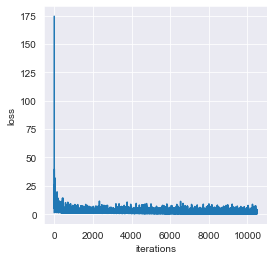

Model: my_MLP, train_Accuracy: 74.78761549105084%
Model: my_MLP, val_Accuracy: 68.30901057705181%


In [144]:
# TODO: add your models here. At least one of them should be your manual model.
model_1 = ManualModel_MLP()
model_assess(model_1, "my_MLP")

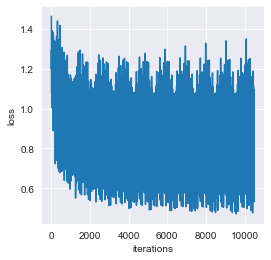

Model: my_LR, train_Accuracy: 73.45751565917308%
Model: my_LR, val_Accuracy: 65.99277011648145%


In [145]:
model_2 = ManualModel_LR()
model_assess(model_2, "my_LR")

In [146]:

model_3 = RandomForestClassifier(n_estimators=8)
model_assess(model_3, "RF")

Model: RF, train_Accuracy: 96.369749899573%
Model: RF, val_Accuracy: 86.02222519748292%


In [147]:

model_4 = LogisticRegression(multi_class='multinomial')
model_assess(model_4, "LR")

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LR, train_Accuracy: 70.87468198116436%
Model: LR, val_Accuracy: 65.2965591109921%


Visualize the model accuracies.

In [148]:
def plot_acc():
    plt.rcParams['figure.figsize']=4,4
    sns.set_style('darkgrid')
    ax = sns.barplot(x=name_acc_list["name"], y=name_acc_list["acc"], palette="coolwarm", saturation=2.0)
    plt.xlabel('Classifier Models', fontsize=12)
    plt.ylabel('% of Accuracy', fontsize=12)
    plt.title('Accuracy of different Classifier Models', fontsize=16)
    plt.xticks(fontsize=12, horizontalalignment='center')
    plt.yticks(fontsize=12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height), ha='center', fontsize='x-large')
    plt.show()

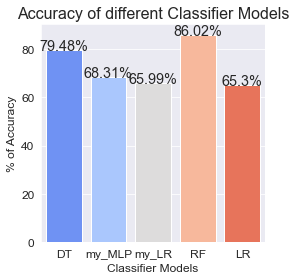

In [149]:
plot_acc()

> **TODO**

**Tune model for good performance on validation set.**

**Note:** you should only tune your model on the validation set, and keep the test data **unseen until the model is selected**.

Now it is your time to provide the final solution.

> Requirements
- Tune model's hyperparameters evaluate all your selected models. And give a detailed report on the performance and computational efficiency.
- Evaluate your final model on test set, and report the final result.
- It is appreciated if other machine learning techniques that help to improve performance are employed.

In [180]:
# TODO: your code here
# k折交叉验证：
name_L = []
acc_L = []

model_5 = ManualModel_LR()
model_6 = ManualModel_MLP()
model_7 = RandomForestClassifier(n_estimators = 8)
model_8 = LogisticRegression(multi_class='multinomial')

def Kfold_val(model, name='Default'):
    kf = KFold(n_splits=5, shuffle = True, random_state= 42)
    acc_list = []
    for trn_idx, val_idx in kf.split(X_train_raw,y_train_raw):
        train_df, train_label = X_train_raw[trn_idx,:],y_train_raw[trn_idx]
        valid_df, valid_label = X_train_raw[val_idx,:],y_train_raw[val_idx]
        model.fit(train_df, train_label)
        prds = model.predict(valid_df)
        acc = 100 * accuracy_score(valid_label,prds)
        acc_list.append(acc)
    acc = np.average(acc_list)
    name_L.append(name)
    acc_L.append(acc)
    

# Kfold_val(model_8, 'LR')
Kfold_val(model_5, 'my_LR')
# Kfold_val(model_6, 'my_MLP')
Kfold_val(model_7, 'RF')

for i in range(len(name_L)):
    name = name_L[i]
    acc = acc_L[i]
    print(f'Model: {name}, KFold_val_Accuracy: {acc}%')

Model: my_LR, KFold_val_Accuracy: 61.559678035716445%
Model: RF, KFold_val_Accuracy: 85.43556943806013%


In [162]:

# 测试集：
def model_test(model, name='Default'):
    prds = model.predict(X_test)
    acc = 100 * accuracy_score(y_test, prds)
    print(f'Model: {name}, test_Accuracy: {acc}%')

model_test(model_3,'RF')


Model: RF, test_Accuracy: 91.60000000000001%


Interface for manual test

In [172]:
index_to_name = {
    0: "Positive",
    1: "Negative",
    2: "Neutral",
    3: "Irrelevant",
}
def my_predict(my_text):
    # 数据清洗
    my_text =[preprocess(my_text)]
    # 特征提取
    my_test = vector_post_process(extractor.transform(my_text))
    # 模型选择
    my_predict = int(model_3.predict(my_test))
    # 预测结果
    return index_to_name[my_predict]

my_predict("Nvidia really delayed the 3070 2 weeks . ")


'Negative'

---